# Modeling

Build x, y, and z models through a supervised learning approach.

In [12]:
from skimage import io
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [3]:
# Load the image
img = io.imread('./training_data/base_image.png')

rows, cols, bands = img.shape

classes = {'vacant_building': 1, 'anything_else': 0}

n_classes = len(classes)

palette = np.uint8([[255, 0, 0], [0, 255, 0]])

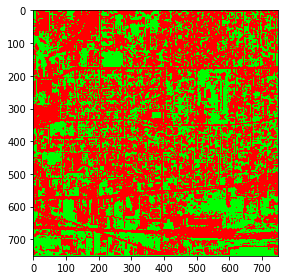

In [6]:
# Unsupervised k-means clustering

X = img.reshape(rows*cols, bands)

kmeans = KMeans(n_clusters=n_classes, random_state=3).fit(X)

unsupervised = kmeans.labels_.reshape(rows, cols)

io.imshow(palette[unsupervised]) ;

In [14]:
# Supervised SVM
supervised = n_classes*np.ones(shape=(rows, cols), dtype=np.int)

# supervised[200:220, 150:170] = classes['vacant_building']

# supervised[40:60, 40:60] = classes['anything_else']

In [ ]:
y = supervised.ravel()

train = np.flatnonzero(supervised < n_classes)
test = np.flatnonzero(supervised == n_classes)

clf = SVC(gamma='auto')
clf.fit(X[train], y[train])

y[test] = clf.predict(X[test])
supervised = y.reshape(rows, cols)

io.imshow(palette[supervised])